In [127]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd
from pitchplotter.plotter import Plotter

In [86]:
csv_file = "VASASHData.csv"

In [87]:
data = pd.read_csv(csv_file,encoding='latin1')

In [88]:
data.columns

Index(['EIAannoID', 'ID', 'Match', 'Round', 'half', 'time',
       'Team in possession', 'possessionlabel', 'player', 'postion',
       'positiondetail', 'team', 'Action', 'Atr', 'LocX', 'LocY', 'Result',
       'Direction/type', 'distance', 'angle', 'DS', 'Season'],
      dtype='object')

In [131]:
data.sort_values(by='possessionlabel')

,EIAannoID,ID,Match,Round,half,time,Team in possession,possessionlabel,player,postion,...,Action,Atr,LocX,LocY,Result,Direction/type,distance,angle,DS,Season
0,52926290,388868,36169,27,1,1.08,Orlando City SC,36169m1,Kak?,MID,...,pass,r,49.450550,47.733002,Cristian Andrés Higuita Beltrán,backwardshort,15.292825,185.292391,0,2017.0
1,52926304,388878,36169,27,1,24.13,Orlando City SC,36169m1,Kak?,MID,...,pass,rd,57.849289,25.188919,Giles Gordon Barnes,backwardshort,18.752331,203.554077,0,2017.0
2,52926317,388887,36169,27,1,45.96,Orlando City SC,36169m1,Kak?,MID,...,pass,r,79.905807,30.730480,Cristian Andrés Higuita Beltrán,backwardshort,14.681073,123.414597,0,2017.0
3,52926390,388923,36169,27,1,179.01,Orlando City SC,36169m7,Kak?,MID,...,pass,l,70.172684,28.337530,Carlos Augusto Rivas Murillo,wide,14.572203,86.603144,0,2017.0
4,52926417,388932,36169,27,1,209.94,Orlando City SC,36169m7,Kak?,MID,...,attacking action,zb,66.099998,9.000000,lose,Ground,0.000000,0.000000,0,2017.0
5,52926515,388978,36169,27,1,328.76,Orlando City SC,36169m16,Kak?,MID,...,attacking action,zb,94.976463,10.075570,lose,Ground,0.000000,0.000000,0,2017.0
6,52926627,389003,36169,27,1,530.08,Orlando City SC,36169m22,Kak?,MID,...,pass,r,44.819469,46.347610,Donald Austin Toia,wide,30.158609,260.108879,0,2017.0
7,52926795,389032,36169,27,1,701.63,Orlando City SC,36169m27,Kak?,MID,...,dribble,NaN,75.902672,11.335010,18.64322825,NaN,0.000000,0.000000,0,2017.0
8,52926798,389033,36169,27,1,702.78,Orlando City SC,36169m27,Kak?,MID,...,pass,r,89.717422,29.219139,NotCompleted,wide,16.052255,91.681224,0,2017.0
9,52926814,389036,36169,27,1,716.86,Orlando City SC,36169m28,Kak?,MID,...,pass,rd,74.332809,15.869020,Donald Austin Toia,backwardshort,15.806857,183.517387,0,2017.0


In [89]:
actions = dict()
for act in data['Action']:
    if act in actions:
        actions[act] += 1
    else:
        actions[act] = 1
actions

{'attacking action': 43525,
 'corner': 3672,
 'defending action': 79107,
 'direct free kick': 406,
 'dribble': 13724,
 'foul': 9041,
 'goal attempt': 8459,
 'goal kick': 6519,
 'indirect free kick': 9833,
 'interception': 5509,
 'offside': 1367,
 'pass': 295057,
 'penalty': 118,
 'reception': 24581,
 'save on goal attempt': 3364,
 'throw in': 16380,
 'touch': 538}

In [138]:
frame = pd.DataFrame(data)
frame[data['team']=='Vancouver Whitecaps FC'].sort_values(by='possessionlabel')


,EIAannoID,ID,Match,Round,half,time,Team in possession,possessionlabel,player,postion,...,Action,Atr,LocX,LocY,Result,Direction/type,distance,angle,DS,Season
340258,44329128,14376,35897,1,1,209.23,Vancouver Whitecaps FC,35897m10,Matías Alejandro Laba,MID,...,pass,r,65.541603,47.607052,Jordan Harvey,wide,17.467206,267.939776,0,2017.0
340260,44329150,14380,35897,1,1,220.43,Vancouver Whitecaps FC,35897m10,Alphonso Davies,MID,...,pass,lv,94.191521,21.662470,NotCompleted,backwardshort,13.109127,102.799684,0,2017.0
340259,44329142,14378,35897,1,1,217.36,Vancouver Whitecaps FC,35897m10,Alphonso Davies,MID,...,attacking action,yz,83.516479,4.911842,win,Groundleft,0.000000,0.000000,0,2017.0
38467,44329133,14377,35897,1,1,213.63,Vancouver Whitecaps FC,35897m10,Jordan Harvey,DEF,...,pass,l,64.913658,22.670031,Alphonso Davies,forwardshort,22.373825,326.248458,0,2017.0
302703,44335746,15114,35897,1,2,249.45,Vancouver Whitecaps FC,35897m101,David Ousted,GK,...,save on goal attempt,chgd,4.709576,48.290001,NaN,NaN,0.000000,0.000000,0,2017.0
228130,44335814,15118,35897,1,2,274.90,Vancouver Whitecaps FC,35897m101,Kekuta Manneh,FW,...,pass,l,62.323391,51.007561,Matías Alejandro Laba,backwardshort,16.532084,221.804581,0,2017.0
340548,44335795,15116,35897,1,2,265.84,Vancouver Whitecaps FC,35897m101,Matías Alejandro Laba,MID,...,pass,dl,41.915230,40.554161,Andrew Jacobson,backwardshort,15.797218,118.814285,0,2017.0
302704,44335784,15115,35897,1,2,264.58,Vancouver Whitecaps FC,35897m101,David Ousted,GK,...,pass,r,9.497645,57.808559,Matías Alejandro Laba,forwardlong,34.594505,339.565713,0,2017.0
340550,44335817,15119,35897,1,2,276.10,Vancouver Whitecaps FC,35897m101,Matías Alejandro Laba,MID,...,attacking action,z,50.000000,35.264481,lose,Ground,0.000000,0.000000,0,2017.0
340549,44335808,15117,35897,1,2,273.56,Vancouver Whitecaps FC,35897m101,Andrew Jacobson,MID,...,pass,r,34.301411,60.327461,Kekuta Manneh,forwardshort,28.771393,346.894159,0,2017.0


In [91]:
def allTargets(player_name,action):
    player_frame = frame[data['player']==player_name]
    pass_targets = dict()
    pass_count = 0
    for target in player_frame[player_frame['Action']==action]['Result']:
        if target in pass_targets:
            pass_targets[target] += 1
            pass_count += 1
        else:
            pass_targets[target] = 1
            pass_count += 1
    return pass_targets, pass_count


In [92]:
targets,tot_cnt = allTargets("Kendall Waston",'pass')

In [93]:
def actionFreq(action_dict,tot_cnt):
    freq_dict = dict()
    for player in targets:
        freq_dict[player] = round(float(targets[player])/tot_cnt,5)
    return freq_dict

In [94]:
a_f = actionFreq(targets,tot_cnt)

In [95]:
def dict2List(dict_):
    L = []
    for key in dict_:
        if not(key == 'NotCompleted'):
            L.append([dict_[key],key])
    L.sort()
    L_key = []
    L_ele = []
    for pair in L:
        L_key.append(pair[1])
        L_ele.append(pair[0])
    return L_key,L_ele

In [96]:
act_list,tar_list = dict2List(a_f)

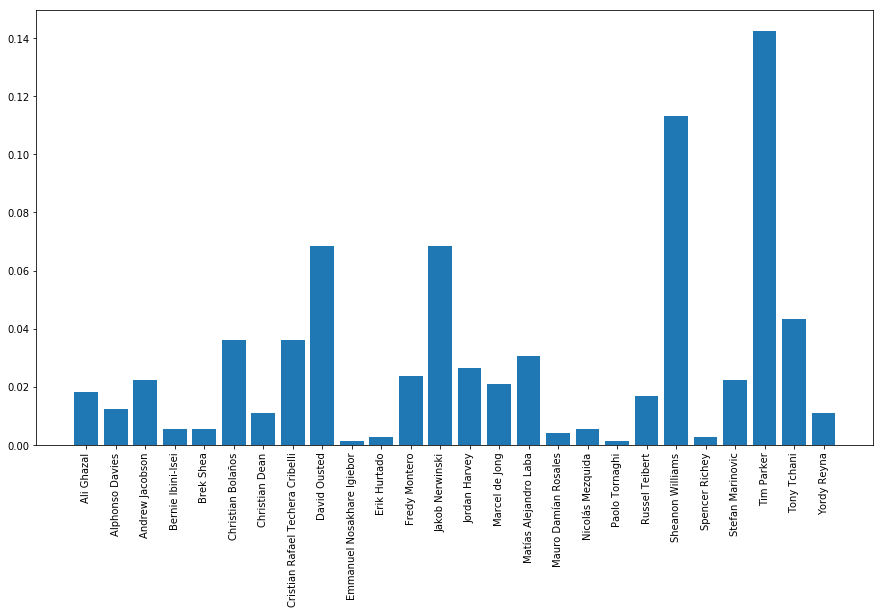

In [97]:
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
plt.bar(act_list,tar_list)
plt.show()

In [98]:
def playerChemistry(player_A, player_B,dict_A,dict_B):
    chem = 0
    if player_A in dict_B:
        chem = chem + dict_B[player_A]
    if player_B in dict_A:
        chem = chem + dict_A[player_B]
    return (chem/2)

In [120]:
players = dict()
for p in frame[data['team']=='Vancouver Whitecaps FC'].player:
    if p in players:
        players[p] += 1
    else:
        players[p] = 1
players

{'Aaron Maund': 86,
 'Ali Ghazal': 372,
 'Alphonso Davies': 701,
 'Andrew Jacobson': 1011,
 'Ben McKendry': 50,
 'Bernie Ibini-Isei': 337,
 'Brek Shea': 732,
 'Christian Bolaños': 1094,
 'Christian Dean': 164,
 'Cristian Rafael Techera Cribelli': 1318,
 'David Ousted': 1178,
 'Emmanuel Nosakhare Igiebor': 60,
 'Erik Hurtado': 298,
 'Fredy Montero': 1326,
 'Jakob Nerwinski': 1188,
 'Jordan Harvey': 1521,
 'Kekuta Manneh': 74,
 'Kendall Waston': 1367,
 'Kyle Greig': 3,
 'Marcel de Jong': 502,
 'Matías Alejandro Laba': 1159,
 'Mauro Damían Rosales': 43,
 'Nicolás Mezquida': 480,
 'Paolo Tornaghi': 35,
 'Russel Teibert': 441,
 'Sheanon Williams': 916,
 'Spencer Richey': 42,
 'Stefan Marinovic': 228,
 'Tim Parker': 1740,
 'Tony Tchani': 1347,
 'Yordy Reyna': 669}

In [117]:
def maxTeamChemistry(team):
    players = dict()
    for p in frame[data['team']=='Vancouver Whitecaps FC'].player:
        if p in players:
            players[p] += 1
        else:
            players[p] = 1
    max_chem = 0
    max_A = []
    max_B = []
    for player_A in players:
        dict_cnt_A,tot_cnt_A = allTargets(player_A,'pass')
        dict_A = actionFreq(dict_cnt_A,tot_cnt_A)
        for player_B in players:
            dict_cnt_B,tot_cnt_B = allTargets(player_B,'pass')
            dict_B = actionFreq(dict_cnt_B,tot_cnt_B)
            chem = playerChemistry(player_A,player_B)
            if chem > max_chem:
                max_chem = chem
                max_A = [player_A]
                max_B = [player_B]
            elif chem == max_chem:
                if not(player_A in max_B) or not(player_B in max_A):
                    max_A.append(player_A)
                    max_B.append(player_B)
    print(max_chem,max_A,max_B)

51.0 ['Kyle Greig'] ['Tim Parker']


In [ ]:
def teamChemistry(team,cut_off):
    players = dict()
    for p in frame[data['team']=='Vancouver Whitecaps FC'].player:
        if p in players:
            players[p] += 1
        else:
            players[p] = 1
    freq_array = []
    for player_A in players:
        if players[player_A] > cut_off:
            dict_cnt_A,tot_cnt_A = allTargets(player_A,'pass')
            dict_A = actionFreq(dict_cnt_A,tot_cnt_A)
            for player_B in players:
                if players[player_B] > cut_off:
                    dict_cnt_B,tot_cnt_B = allTargets(player_B,'pass')
                    dict_B = actionFreq(dict_cnt_B,tot_cnt_B)
                    chem = playerChemistry(player_A,player_B)
                    

In [15]:
#print(frame.Team) #Or "frame['Team']"

#for i in range(0,890):
#    if frame.ix[i] #Looks at one row (player in this case) of data

#print("********************\n***** Describe *****\n********************")
#print(data.describe())

#print("************************\n***** Sort - Teams *****\n************************")
#print(data.sort_values(by="Team"))

#print("**********************\n***** Last Names *****\n**********************")
#print(data["Last Name"])

#print("***********************************\n***** Last Names, First Names *****\n***********************************")
#print(data.loc[:,['LastName','FirstName']])   # ".head()" shows the first 5 entries, similarly ".tail()" shows the last 5

#print("********************************\n***** First Player's Stats *****\n********************************")
#print(data.loc[0])

#print("***************************\n***** Players Over 6\" *****\n***************************")
#print(data[data.Ht > 72])

#print("********************************\n***** Mean of all sections *****\n********************************")
#print(data.mean())

#print("***************************************************\n***** Add all sections, but seperated by team *****\n***************************************************")
#print(data.groupby(["Team"]).sum())

#print("*************************************\n***** Restacks the data per Row *****\n*************************************")
#print(data.stack())

#print("*****************************\n***** Unstacks the data *****\n*****************************")
#print(data.unstack())

#print("*****************************\n***** Prints players with last name Marner *****\n*****************************")
#print(data['Last Name' == 'Marner'])


In [130]:
demo_arr = [
    [25,50,'Event 1', 34],
    [35,41,'Event 2', 14],
    [20,33,'Event 3', 23],
    [10,52,'Event 4', 56],
    [45,60,'Event 5', 9]
]

Plotter.add_events(demo_arr, "Demo events")

plotter.plot()

TypeError: add_events() missing 1 required positional argument: 'title'